# Team 1 - Chocolate Bar

![](https://img.newatlas.com/cocoa-tree-domestication-chocolate-1.jpg?auto=format%2Ccompress&ch=Width%2CDPR&fit=crop&h=347&q=60&rect=0%2C18%2C1620%2C911&w=616&s=2c0f902d21b734d77c99fd13171fb979)

_For more information about the dataset, read [here](https://www.kaggle.com/rtatman/chocolate-bar-ratings)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of poorly labeled data in `Broad Bean Origin` column.
- There are some rows in `Broad Bean Origin` with multiple values, those values will create errors in our data. 
- How can we get rid of the `%` sign in `Cocoa Percent` column?
- And more...

# My solution

# 1. Import package

In [0]:
import io
import re

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [0]:
link = 'https://raw.githubusercontent.com/nnbtam99/coderschool-ds-t2-t4/master/W04%20-%20Data%20manipulation%20%2B%20Visualization/01%20-%20Chocolate%20Bar%20Ratings/flavors_of_cacao.csv'

df = pd.read_csv(link)

# 2. Overview and clean data 

In [0]:
df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [0]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [0]:
df.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

## Normalize column names

In [0]:
new_columns = ['company', 'specific_origin', 'REF', 'review_date', 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']
df.columns = new_columns

In [0]:
df.head().T

,0,1,2,3,4
company,A. Morin,A. Morin,A. Morin,A. Morin,A. Morin
specific_origin,Agua Grande,Kpime,Atsane,Akata,Quilla
REF,1876,1676,1676,1680,1704
review_date,2016,2015,2015,2015,2015
cocoa_percent,63%,70%,70%,70%,70%
company_location,France,France,France,France,France
rating,3.75,2.75,3,3.5,3.5
bean_type,,,,,
broad_origin,Sao Tome,Togo,Togo,Togo,Peru


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
company             1795 non-null object
specific_origin     1795 non-null object
REF                 1795 non-null int64
review_date         1795 non-null int64
cocoa_percent       1795 non-null object
company_location    1795 non-null object
rating              1795 non-null float64
bean_type           1794 non-null object
broad_origin        1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


### Check all values of each feature

In [0]:
df['company_location'].sort_values().unique()

# UK includes Ireland, Scotland, Wales and England, so the values are quite ambiguous --> Perhaps U.K in this context referes to England 
# Dominican Republic is mispelled
# Nicaragua is mispelled
# Amsterdam is a city of Netherlands, not a country --> So Amsterdam should be replaced with Netherlands

array(['Amsterdam', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Domincan Republic', 'Ecuador',
       'Eucador', 'Fiji', 'Finland', 'France', 'Germany', 'Ghana',
       'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar',
       'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Niacragua',
       'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'St. Lucia', 'Suriname',
       'Sweden', 'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela', 'Vietnam',
       'Wales'], dtype=object)

In [0]:
# This column datatype is object, which is quite unreasonable
# I'll remove the '%' symbol and convert it to float 
df['cocoa_percent'].unique()

array(['63%', '70%', '60%', '80%', '88%', '72%', '55%', '75%', '65%',
       '85%', '73%', '64%', '66%', '68%', '50%', '100%', '77%', '90%',
       '71%', '83%', '78%', '74%', '76%', '86%', '82%', '69%', '91%',
       '42%', '61%', '73.5%', '62%', '67%', '58%', '60.5%', '79%', '81%',
       '57%', '72.5%', '56%', '46%', '89%', '99%', '84%', '53%', '87%'],
      dtype=object)

In [0]:
# Check if bean_type has mispelled or missing values
df['bean_type'].sort_values().unique()

array(['Amazon', 'Amazon mix', 'Amazon, ICS', 'Beniano', 'Blend',
       'Blend-Forastero,Criollo', 'CCN51', 'Criollo', 'Criollo (Amarru)',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 67)',
       'Criollo (Ocumare 77)', 'Criollo (Ocumare)', 'Criollo (Porcelana)',
       'Criollo (Wild)', 'Criollo, +', 'Criollo, Forastero',
       'Criollo, Trinitario', 'EET', 'Forastero', 'Forastero (Amelonado)',
       'Forastero (Arriba)', 'Forastero (Arriba) ASS',
       'Forastero (Arriba) ASSS', 'Forastero (Catongo)',
       'Forastero (Nacional)', 'Forastero (Parazinho)',
       'Forastero(Arriba, CCN)', 'Forastero, Trinitario', 'Matina',
       'Nacional', 'Nacional (Arriba)', 'Trinitario',
       'Trinitario (85% Criollo)', 'Trinitario (Amelonado)',
       'Trinitario (Scavina)', 'Trinitario, Criollo',
       'Trinitario, Forastero', 'Trinitario, Nacional',
       'Trinitario, TCGA', '\xa0', nan], dtype=object)

In [0]:
# Check if broad_origin has mispelled or missing values
df['broad_origin'].sort_values().unique()

array(['Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia',
       'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean(DR/Jam/Tri)', 'Central and S. America', 'Colombia',
       'Colombia, Ecuador', 'Congo', 'Cost Rica, Ven', 'Costa Rica',
       'Cuba', 'DR, Ecuador, Peru', 'Dom. Rep., Madagascar',
       'Domincan Republic', 'Dominican Rep., Bali', 'Dominican Republic',
       'Ecuador', 'Ecuador, Costa Rica', 'Ecuador, Mad., PNG',
       'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Ghana & Madagascar',
       'Ghana, Domin. Rep', 'Ghana, Panama, Ecuador',
       'Gre., PNG, Haw., Haiti, Mad', 'Grenada',
       'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii',
       'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana',
       'Ivory Coast', 'Jamaica', 'Liberia', 'Mad., Java, PNG',
       'Madagascar', 'Madagascar & Ecuador', 'Malaysia', 'Martinique',
       'Mexico', 'Nicaragua', 'Nigeria', 'PNG, Vanuatu, Mad', 'Panama',
       'Papua New Guinea', 'Per

## Clean poorly labeled data

#### Remove unicode space '\xa0'

In [0]:
df.replace(u'\xa0',u'', regex=True, inplace=True)

#### Clean cocoa_percent column

In [0]:
df['cocoa_percent'] = [r.replace('%', '') for r in df['cocoa_percent']]
df['cocoa_percent'] = df['cocoa_percent'].astype('float64')
df.dtypes

company              object
specific_origin      object
REF                   int64
review_date           int64
cocoa_percent       float64
company_location     object
rating              float64
bean_type            object
broad_origin         object
dtype: object

#### Clean company_location column

In [0]:
# UK includes Ireland, Scotland, Wales and England, so the values are quite ambiguous --> Perhaps U.K in this context referes to England 
# Dominican Republic is mispelled
# Nicaragua is mispelled
# Amsterdam is a city of Netherlands, not a country --> So Amsterdam should be replaced with Netherlands


df['company_location'] = df['company_location']\
  .replace('U.K.', 'England')\
  .replace('Domincan Republic', 'Dominican Republic')\
  .replace('Niacragua', 'Nicaragua')\
  .replace('Amsterdam', 'Netherlands')

df['company_location'].sort_values().unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'England', 'Eucador', 'Fiji', 'Finland', 'France', 'Germany',
       'Ghana', 'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania',
       'Madagascar', 'Martinique', 'Mexico', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'St. Lucia', 'Suriname',
       'Sweden', 'Switzerland', 'U.S.A.', 'Venezuela', 'Vietnam', 'Wales'],
      dtype=object)

#### Clean broad_origin column

In [0]:
# nan is numpy datatype --> fillna before applying text_processing
# Some specific origins are blend-type --> I'll check if blend-type denote something about the broad origin

df[df['specific_origin'].str.contains('Blend')].head(10)

,company,specific_origin,REF,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
277,Burnt Fork Bend,Blend,1303,2014,72.0,U.S.A.,3.25,Blend,
381,Chloe Chocolat,Blend No. 1,672,2011,70.0,France,3.50,,
393,Chocolate Alchemist-Philly,"Philly Blend, 5 plantations",1772,2016,80.0,U.S.A.,2.50,,
564,Domori,Blend No. 1,272,2008,78.0,Italy,3.50,Blend,
725,Fruition,Signature Blend,753,2011,66.0,U.S.A.,3.25,Trinitario,Costa Rica
747,Guido Castagna,Lacri Blend,355,2009,76.0,Italy,3.00,,Venezuela
748,Guido Castagna,Blend,355,2009,64.0,Italy,3.25,,"Ven, Trinidad, Ecuador"
749,Guittard,"Epique, Blend No. 49",1602,2015,70.0,U.S.A.,3.75,,
785,Harper Macaw,Brazil Blend,1696,2015,67.0,U.S.A.,3.00,,Brazil
957,L'Amourette,Blend,853,2012,72.0,U.S.A.,3.00,Criollo,"Peru, Ecuador, Venezuela"


In [0]:
# As we can guess, if a kind of chocolate derives from too many countries, its broad origin will be missing
# Hence I'll fill missing broad_origin with its specific origin
df['broad_origin'].fillna(df['specific_origin'], inplace = True)

In [0]:
df['broad_origin'].sort_values().unique()

array(['', 'Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia',
       'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean(DR/Jam/Tri)', 'Central and S. America', 'Colombia',
       'Colombia, Ecuador', 'Congo', 'Cost Rica, Ven', 'Costa Rica',
       'Cuba', 'DR, Ecuador, Peru', 'Dom. Rep., Madagascar',
       'Domincan Republic', 'Dominican Rep., Bali', 'Dominican Republic',
       'Ecuador', 'Ecuador, Costa Rica', 'Ecuador, Mad., PNG',
       'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Ghana & Madagascar',
       'Ghana, Domin. Rep', 'Ghana, Panama, Ecuador',
       'Gre., PNG, Haw., Haiti, Mad', 'Grenada',
       'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii',
       'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana',
       'Ivory Coast', 'Jamaica', 'Liberia', 'Mad., Java, PNG',
       'Madagascar', 'Madagascar & Ecuador', 'Malaysia', 'Martinique',
       'Mexico', 'Nicaragua', 'Nigeria', 'PNG, Vanuatu, Mad', 'Panama',
       'Papua New Guinea', 

In [0]:
# Many countries are refered by different names and abbreviations
# Eg: Dominican Republic is Dominican Rep., DR, D.R., Domin. Rep, etc
# Modify so that every country will be refered with just 1 name

def text_prep(text):
    replacements = {
        '-':', ', '/ ': ', ', '/': ', ', '\(': ', ',' and':', ', ' & ': ', ', '\)': '',
        'Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic':'Dominican Republic',
        'Mad,|Mad$':'Madagascar, ',
        'PNG': 'Papua New Guinea, ',
        'Guat,|Guat$': 'Guatemala, ',
        'Ven,|Ven$|Venez,|Venez$':'Venezuela, ',
        'Ecu,|Ecu$|Ecuad,|Ecuad$': 'Ecuador, ',
        'Nic,|Nic$': 'Nicaragua, ',
        'Cost Rica':'Costa Rica',
        'Mex,|Mex$': 'Mexico, ',
        'Jam,|Jam$': 'Jamaica, ',
        'Haw,|Haw$': 'Hawaii, ',
        'Gre,|Gre$': 'Greneda, ',
        'Tri,|Tri$': 'Trinidad, ',
        'C Am':'Central America',
        'S America':'South America',
        ', $':'', ',  ': ', ', ', ,':', ', '\xa0':' ',',\s+': ',',
        ' Bali': ',Bali',
        'nacional': 'Nacional'
    }
    
    for k, v in replacements.items():
      text = re.sub(k, v, text)

    return text

In [0]:
df['broad_origin'].str.replace('.', '').apply(text_prep).sort_values().unique()

array(['', 'Africa,Carribean,Central America', 'Australia', 'Belize',
       'Bolivia', 'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean,Dominican Republic,Jamaica,Trinidad',
       'Central,South America', 'Colombia', 'Colombia,Ecuador', 'Congo',
       'Costa Rica', 'Costa Rica,Venezuela', 'Cuba', 'Dominican Republic',
       'Dominican Republic,Bali', 'Dominican Republic,Ecuador,Peru',
       'Dominican Republic,Madagascar', 'Ecuador', 'Ecuador,Costa Rica',
       'Ecuador,Madagascar,Papua New Guinea', 'El Salvador', 'Fiji',
       'Gabon', 'Ghana', 'Ghana,Dominican Republic', 'Ghana,Madagascar',
       'Ghana,Panama,Ecuador', 'Grenada',
       'Greneda,Papua New Guinea,Hawaii,Haiti,Madagascar', 'Guatemala',
       'Guatemala,Dominican Republic,Peru,Madagascar,Papua New Guinea',
       'Haiti', 'Hawaii', 'Honduras', 'India', 'Indonesia',
       'Indonesia,Ghana', 'Ivory Coast', 'Jamaica', 'Liberia',
       'Madagascar', 'Madagascar,Ecuador',
       'Madagascar,Java,Papu

In [0]:
df['broad_origin'] = df['broad_origin'].str.replace('.', '').apply(text_prep)

In [0]:
df.broad_origin.unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '', 'Jamaica', 'Grenada',
       'Guatemala', 'Honduras', 'Costa Rica', 'Haiti', 'Congo',
       'Philippines', 'Malaysia', 'Dominican Republic,Bali',
       'Venezuela,Africa,Brasil,Peru,Mexico', 'Gabon', 'Ivory Coast',
       'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda', 'Martinique',
       'Sao Tome,Principe', 'Vanuatu', 'Australia', 'Liberia',
       'Ecuador,Costa Rica', 'West Africa', 'Hawaii', 'St Lucia',
       'Costa Rica,Venezuela', 'Peru,Madagascar', 'Venezuela,Trinidad',
       'Trinidad,Tobago', 'Venezuela,Trinidad,Ecuador',
       'South America,Africa', 'India',
       'Africa,Carribean,Central America', 'Tobago',
       'Venezuela,Indonesia,Ecuador', 'Peru,Ecuador,Vene

##Save root data after cleaning to csv

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# %cd '/content/drive/My Drive/CoderSchool/Chocolate'

In [0]:
# df.to_csv('chocolate.csv', index=False)

In [0]:
# df.review_date.head(2)

##Convert broad_origins to list

In [0]:
def split_places(origin):
  return origin.split(',')

broad_origins = df.broad_origin.apply(split_places)

In [0]:
### get list of broad origins:
def get_broad_origins_list(origins_series):
  origins = {}
  for ls in origins_series.values:
    for origin in ls:
      if origin not in origins:
        origins.update({origin : 1})
      else:
        origins[origin]+=1
  return origins

unique_broad_origins = get_broad_origins_list(broad_origins)

In [0]:
origin_df = pd.DataFrame.from_dict(unique_broad_origins, orient='index', columns=['count'])
origin_df.head()

,count
Sao Tome,17
Togo,3
Peru,176
Venezuela,228
Cuba,11


In [0]:
origin_df.reset_index(drop=False, inplace=True);
origin_df.rename(columns={'index':'country'}, inplace=True);
origin_df.head()


,country,count
0,Sao Tome,17
1,Togo,3
2,Peru,176
3,Venezuela,228
4,Cuba,11


number of bean types in each broad_origin


In [0]:
origin_df.dropna(axis=0, inplace=True)
origin_df.describe()

,count
count,66.000000
mean,28.454545
std,50.167161
min,1.000000
25%,2.250000
50%,8.000000
75%,33.250000
max,228.000000


In [0]:
#origin_df.to_csv('broad_origins.csv', index=False)

# 3. Data Analysis 

##Correlation

Text(0.5, 1.0, 'Correlation Heatmap')

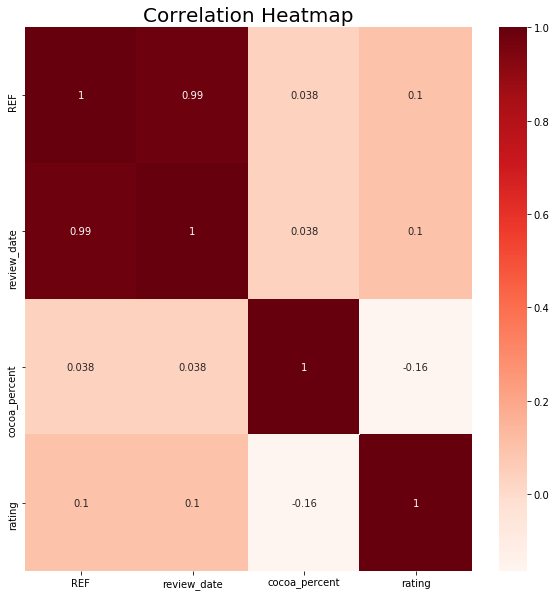

In [0]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

## Rating

### In General

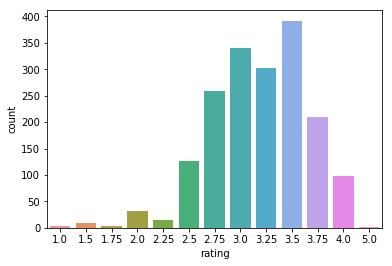

In [0]:
# rating_count = df.rating.value_counts().to_frame('count');
# rating_count.reset_index(drop=False, inplace=True);
# rating_count.rename(columns={'index':'rating'}, inplace=True);
# rating_count.head(2)
sns.countplot(x='rating', data=df)

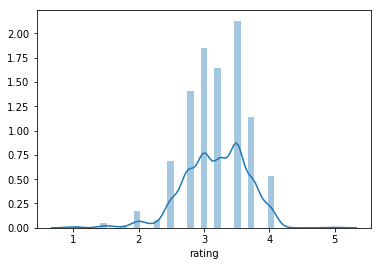

In [0]:
sns.distplot(df['rating']);

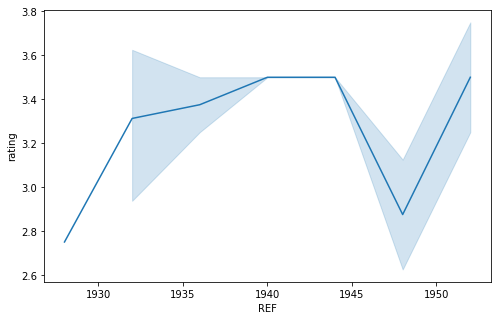

In [0]:

plt.figure(figsize=(8, 5))
sns.lineplot(x='REF', y='rating', data=df[df.review_date==2017].sort_values(by='REF', ascending=True))

### Classify rating marks

In [0]:
def rating_classify(rating):
  if rating >= 5:
    return 'elite'
  if rating >= 4 and rating < 5:
    return 'premium'
  if rating >= 3 and rating < 4:
    return 'satisfactory'
  if rating >= 2 and rating < 3:
    return 'disapointing'
  return 'unpleasant'

In [0]:
df['rating_class'] = df.rating
df.rating_class = df.rating_class.apply(rating_classify);
df.head(2)

,company,specific_origin,REF,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin,rating_class
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome,satisfactory
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo,disapointing


###Rare chocolate: Premium and Elite

['satisfactory', 'disapointing', 'premium', 'unpleasant', 'elite']


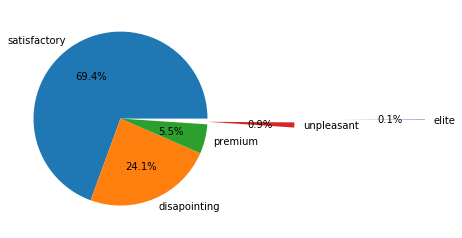

In [0]:
classes = df.rating_class.value_counts().index.tolist()
sizes = df.rating_class.value_counts().values.tolist()
print(classes)
explode=(0, 0, 0, 1, 2.5)
plt.pie(sizes, labels=classes, explode=explode, autopct='%1.1f%%')
plt.show()



In [0]:
df.rating_class.value_counts()

satisfactory    1246
disapointing     432
premium           98
unpleasant        17
elite              2
Name: rating_class, dtype: int64

### Correlation between rating with cocoa percent

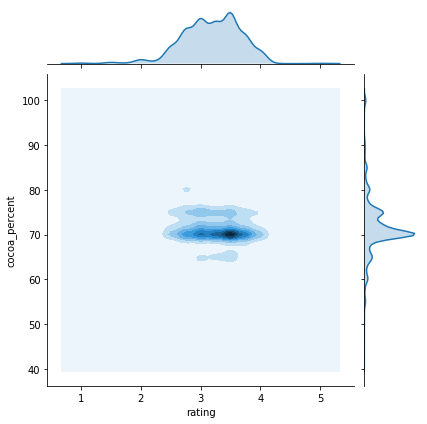

In [0]:
sns.jointplot(x="rating", y="cocoa_percent", kind='kde', data=df);

In [0]:
!pip install --upgrade -q gspread

#### Top 10 companies with highest avg rating score

In [0]:
top_10_rating_companies = df[['company','company_location', 'cocoa_percent', 'rating']].groupby(['company','company_location']).mean()
top_10_rating_companies.reset_index(drop=False, inplace=True);
top_10_rating_companies.sort_values(by = ['rating'],ascending =False).head(10)

,company,company_location,cocoa_percent,rating
381,Tobago Estate (Pralus),France,70.000000,4.000000
287,Ocelot,Scotland,72.500000,3.875000
183,Heirloom Cacao Preservation (Zokoko),U.S.A.,70.000000,3.875000
14,Amedei,Italy,69.538462,3.846154
249,Matale,Australia,71.000000,3.812500
304,Patric,U.S.A.,69.833333,3.791667
191,Idilio (Felchlin),Switzerland,72.000000,3.775000
96,Christopher Morel (Felchlin),Canada,68.000000,3.750000
125,Dole (Guittard),U.S.A.,70.000000,3.750000
2,Acalli,U.S.A.,70.000000,3.750000


#### Top 10 rating company location

In [0]:
top_10_rating_company_locations = df[['company_location', 'cocoa_percent', 'rating']].groupby('company_location').mean()
top_10_rating_company_locations.reset_index(drop=False, inplace=True);
top_10_rating_company_locations.sort_values(by = ['rating'],ascending =False).head(10)

,company_location,cocoa_percent,rating
7,Chile,70.000000,3.750000
39,Philippines,65.000000,3.500000
35,Netherlands,71.625000,3.500000
25,Iceland,68.666667,3.416667
56,Vietnam,74.545455,3.409091
5,Brazil,69.823529,3.397059
40,Poland,71.875000,3.375000
1,Australia,70.224490,3.357143
22,Guatemala,70.200000,3.350000
53,Switzerland,71.210526,3.342105


### Popular

#### Top 10 most popular companies

In [0]:
def n_most_company(n):
  length = df.shape[0]
  df['count'] = np.ones(length)
  most_company = df.groupby('company').sum().sort_values(by = 'count', ascending=False)
  return most_company.head(n).index

ten_most_company = n_most_company(10)
def is_top_10_company(x):
  if x in ten_most_company:
    return True
  else:
    return False
  
top_10_popular_company = df[df['company'].apply(is_top_10_company)]
top_10_popular_company.company.unique()


array(['A. Morin', 'Arete', 'Bonnat', 'Domori', 'Fresco', 'Guittard',
       'Hotel Chocolat (Coppeneur)', 'Pralus', 'Soma', 'Valrhona'],
      dtype=object)

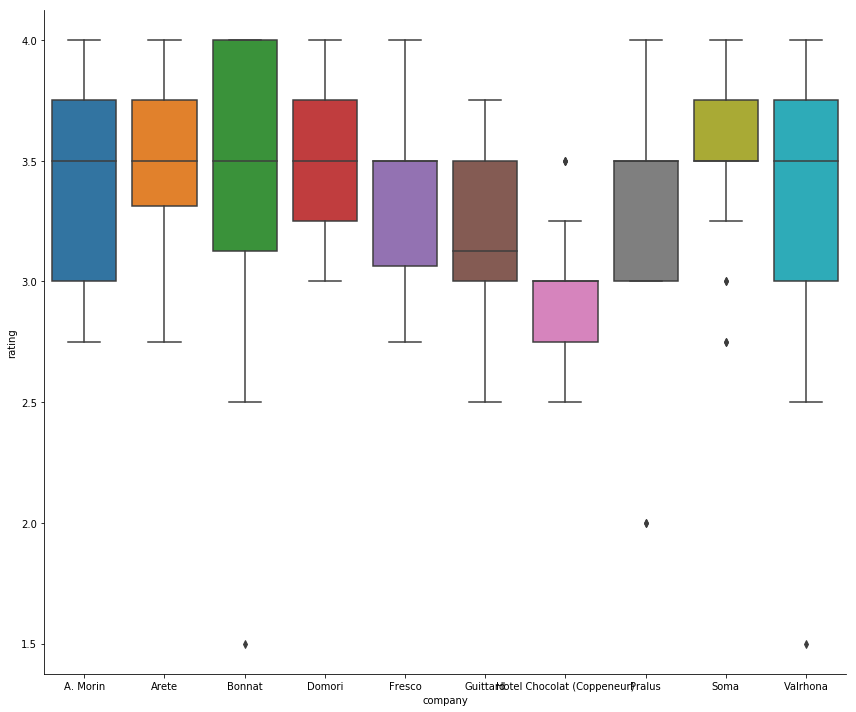

In [0]:
ax = sns.catplot(x="company", y="rating", kind="box", data=top_10_popular_company,aspect =1.2, height=10)

#### Top 10 most popular Company Locations

In [0]:
def n_most_company_location(n):
  length = df.shape[0]
  df['count'] = np.ones(length)
  most_company = df.groupby('company_location').sum().sort_values(by = 'count', ascending=False)
  return most_company.head(n).index

ten_most_company_location = n_most_company_location(10)

def is_top_10_company_location(x):
  if x in ten_most_company_location:
    return True
  else:
    return False
  
top_10_company_location = df[df['company_location'].apply(is_top_10_company_location)]
ax = sns.catplot(x="company_location", y="rating", kind="box", data=top_10_company_location,height =10, aspect =1.2)

##Review_date (year)

### In General

In [0]:
sns.distplot(df['review_date'],kde=False);
plt.title('Distribution of review date')
# Perfect period is 2012-2016
# Worst period is 2006-2009

In [0]:
#average cocoa_percent by year
avg_cocoa_year = df.groupby('review_date').mean()
avg_cocoa_year


### Correlation between review date and rating

In [0]:
sns.jointplot(x="review_date", y="rating", kind='kde', data=df);
## We realize that 2013-2016 period has high rating

###Perfect period

In [0]:
perfect_period = df[(2013<= df['review_date']) & (df['review_date'] <= 2016)]

In [0]:
worst_period = df[(2010 > df['review_date']) | (2016 < df['review_date']) ]

Text(0.5, 1.0, 'Cocoa percent in worst period')

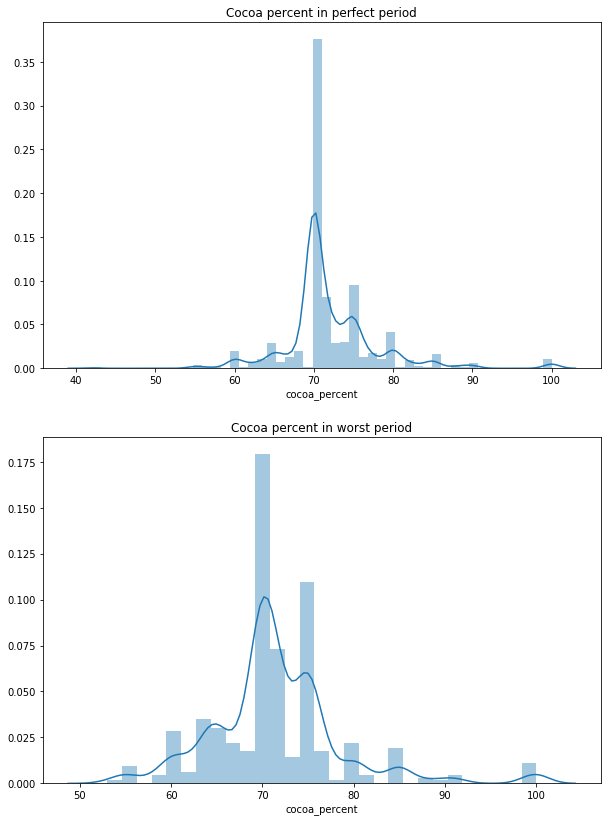

In [0]:
fig = plt.figure(figsize = (10,14))
fig.add_subplot(211)   #top left
ax = sns.distplot(perfect_period['cocoa_percent'])
plt.title('Cocoa percent in perfect period')
fig.add_subplot(212)   #
ax = sns.distplot(worst_period['cocoa_percent'])
plt.title('Cocoa percent in worst period')

#### Top 10 rating company

In [0]:
com_loca_cocoa_percent = perfect_period[['company','company_location', 'cocoa_percent', 'rating']].groupby(['company','company_location']).mean()
com_loca_cocoa_percent.reset_index(drop=False, inplace=True);
com_loca_cocoa_percent.sort_values(by = ['rating'],ascending =False).head(10)

,company,company_location,cocoa_percent,rating
214,Patric,U.S.A.,67.0,4.0000
203,Ocelot,Scotland,72.5,3.8750
130,Heirloom Cacao Preservation (Zokoko),U.S.A.,70.0,3.8750
174,Matale,Australia,71.0,3.8125
64,"Chocolate Tree, The",Scotland,73.0,3.7500
13,Askinosie,U.S.A.,68.0,3.7500
263,Timo A. Meyer,Germany,72.0,3.7500
146,Kerchner,U.S.A.,70.0,3.7500
90,Duffy's,England,72.0,3.7500
16,Bar Au Chocolat,U.S.A.,70.0,3.7500


In [0]:
com_loca_cocoa_percent = worst_period[['company','company_location', 'cocoa_percent', 'rating']].groupby(['company','company_location']).mean()
com_loca_cocoa_percent.reset_index(drop=False, inplace=True);
com_loca_cocoa_percent.sort_values(by = ['rating'],ascending =False).head(10)

,company,company_location,cocoa_percent,rating
15,Cacao Sampaka,Spain,70.000000,4.000000
5,Amedei,Italy,69.500000,3.854167
72,Patric,U.S.A.,70.500000,3.750000
33,Dick Taylor,U.S.A.,70.000000,3.750000
52,Kakao,Germany,65.000000,3.750000
34,Dole (Guittard),U.S.A.,70.000000,3.750000
61,Madecasse (Cinagra),Madagascar,68.750000,3.687500
73,Pierre Marcolini,Belgium,73.222222,3.583333
2,Alexandre,Netherlands,70.000000,3.500000
62,Madre,U.S.A.,73.000000,3.500000


#### Top 10 rating company location

In [0]:
com_loca_cocoa_percent = perfect_period[['company_location', 'cocoa_percent', 'rating']].groupby('company_location').mean()
com_loca_cocoa_percent.reset_index(drop=False, inplace=True);
com_loca_cocoa_percent.sort_values(by = ['rating'],ascending =False).head(10)

,company_location,cocoa_percent,rating
37,Scotland,72.800000,3.800000
5,Chile,70.000000,3.750000
33,Poland,73.750000,3.625000
48,Vietnam,74.500000,3.500000
32,Philippines,65.000000,3.500000
29,Netherlands,73.250000,3.500000
2,Belgium,71.500000,3.475000
11,Ecuador,70.363636,3.431818
18,Hungary,71.636364,3.431818
19,Iceland,68.666667,3.416667


In [0]:
com_loca_cocoa_percent = worst_period[['company_location', 'cocoa_percent', 'rating']].groupby('company_location').mean()
com_loca_cocoa_percent.reset_index(drop=False, inplace=True);
com_loca_cocoa_percent.sort_values(by = ['rating'],ascending =False).head(10)

,company_location,cocoa_percent,rating
16,Netherlands,70.000000,3.500000
1,Australia,70.000000,3.500000
13,Italy,69.555556,3.493056
0,Argentina,73.750000,3.312500
4,Canada,72.764706,3.235294
14,Madagascar,71.083333,3.208333
9,Germany,70.222222,3.194444
8,France,72.930556,3.184028
12,Israel,71.250000,3.125000
11,Guatemala,67.500000,3.125000


#### Top 10 most popular Companies in perfect and worst period

In [0]:
def n_most_company(n, df):
  length = df.shape[0]
  df['count'] = np.ones(length)
  most_company = df.groupby('company').sum().sort_values(by = 'count', ascending=False)
  return most_company.head(n).index

def is_top_10_company(x):
  if x in ten_most_company:
    return True
  else:
    return False


In [0]:
ten_most_company = n_most_company(10, perfect_period)
top_10_company = perfect_period[perfect_period['company'].apply(is_top_10_company)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
ten_most_company_1 = n_most_company(10, worst_period)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
def is_top_10_company_1(x):
  if x in ten_most_company_1:
    return True
  else:
    return False

In [0]:
top_10_company_1 = worst_period[worst_period['company'].apply(is_top_10_company_1)]
top_10_company_1['review_date'].unique()

array([2007, 2006, 2009, 2008])

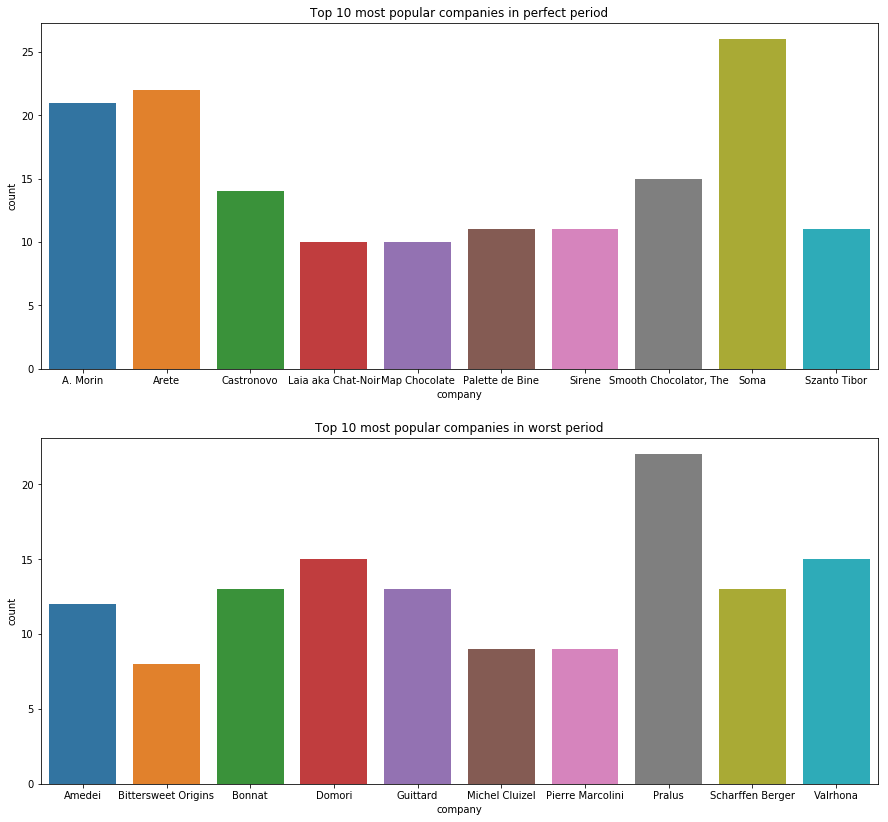

In [0]:
fig = plt.figure(figsize=(15,14))
fig.add_subplot(211)   #top left
ax = sns.countplot(x="company", data = top_10_company)
plt.title('Top 10 most popular companies in perfect period')

title = fig.add_subplot(212)   #top left
ax = sns.countplot(x="company", data = top_10_company_1)
title = plt.title('Top 10 most popular companies in worst period')
## We easily realize that the last company in perfect period is better than the first company in worst period
## Soma is the best company to produce chocolate bar
## Top 10 in two period is completely different

#### Top 10 most popular company locations in perfect period 

In [0]:
def n_most_company_location(n, df):
  length = df.shape[0]
  df['count'] = np.ones(length)
  most_company = df.groupby('company_location').sum().sort_values(by = 'count', ascending=False)
  return most_company.head(n).index

In [0]:
ten_most_company_location = n_most_company_location(10, perfect_period)

In [0]:
def is_top_10_company_location(x):
  if x in ten_most_company_location:
    return True
  else:
    return False

In [0]:
top_10_company_location = perfect_period[perfect_period['company_location'].apply(is_top_10_company_location)]

In [0]:
ten_most_company_location_1 = n_most_company_location(10, worst_period)

In [0]:
ten_most_company_location_1

Index(['U.S.A.', 'France', 'Ecuador', 'Italy', 'Belgium', 'Canada', 'England',
       'Spain', 'Madagascar', 'Switzerland'],
      dtype='object', name='company_location')

In [0]:
def is_top_10_company_location_1(x):
  if x in ten_most_company_location_1:
    return True
  else:
    return False

In [0]:
top_10_company_location_1 = worst_period[worst_period['company_location'].apply(is_top_10_company_location_1)]

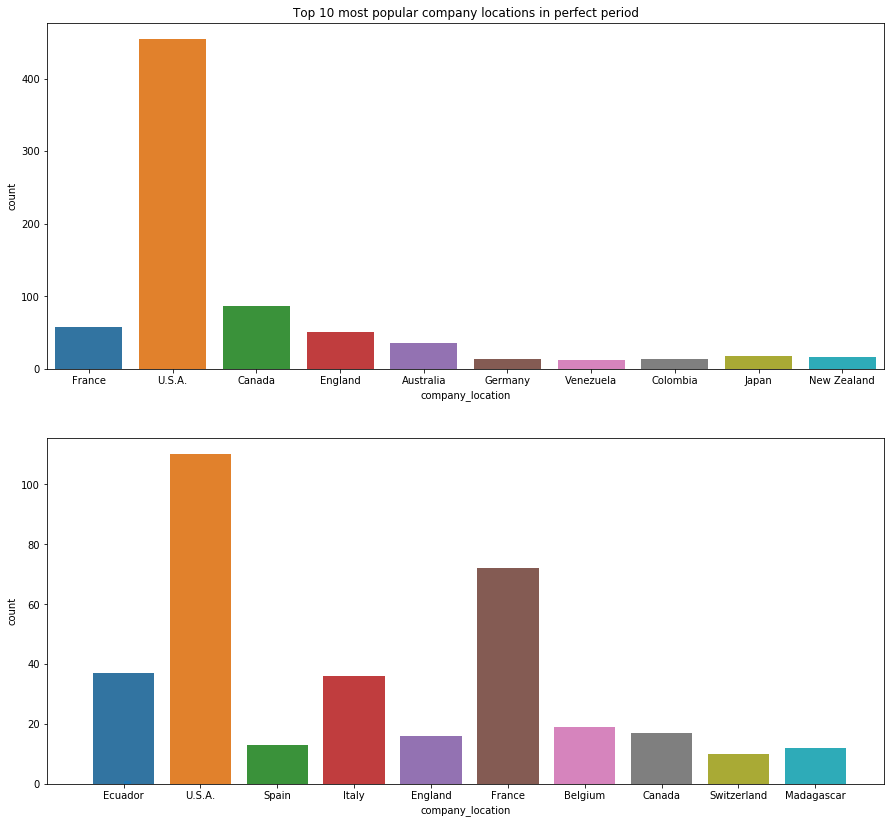

In [0]:
fig = plt.figure(figsize=(15,14))
fig.add_subplot(211)   #top left
ax = sns.countplot(x="company_location", data = top_10_company_location)
plt.title('Top 10 most popular company locations in perfect period')

title = fig.add_subplot(212)   #top left
ax = sns.countplot(x="company_location", data = top_10_company_location_1)
title = plt.hist('Top 10 most popular company locations in worst period')

# No matter time, U.S.A is the best location company 

In [0]:
def is_top_10_company_location_3(x):
  if x in ten_most_company_location and x !='U.S.A.':
    return True
  else:
    return False

In [0]:
def is_top_10_company_location_4(x):
  if x in ten_most_company_location_1 and x !='U.S.A.':
    return True
  else:
    return False

In [0]:
ten_most_company_location_3 = n_most_company_location(10, perfect_period)

In [0]:
top_10_company_location_3 = perfect_period[perfect_period['company_location'].apply(is_top_10_company_location_3)]

In [0]:
ten_most_company_location_4 = n_most_company_location(10, worst_period)

In [0]:
top_10_company_location_4 = perfect_period[perfect_period['company_location'].apply(is_top_10_company_location_4)]

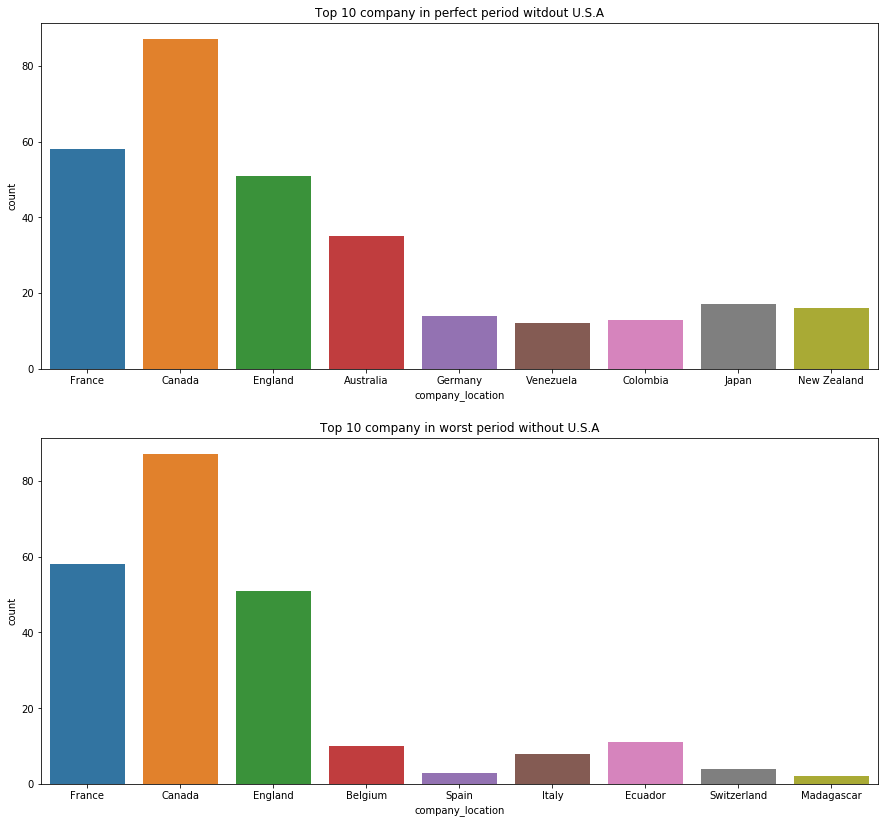

In [0]:
fig = plt.figure(figsize=(15,14))
fig.add_subplot(211)   #top left
ax = sns.countplot(x="company_location", data = top_10_company_location_3)
plt.title('Top 10 company in perfect period witdout U.S.A')

title = fig.add_subplot(212)   #top left
ax = sns.countplot(x="company_location", data = top_10_company_location_4)
title = plt.title('Top 10 company in worst period without U.S.A')

# No matter time, U.S.A is the best location company 

### Rating score rank by years


In [0]:
by_year = df[['company', 'rating', 'review_date']].groupby('review_date').mean().sort_values(by = 'rating', ascending=False);
year_ranks = []
review_date_years = df.review_date.unique()
for year in review_date_years:
  rank_board = df[df.review_date==year][['company', 'rating', 'company_location']].groupby(['company', 'company_location']).mean().sort_values(by='rating', ascending=False).reset_index(drop=False)
  rank_board.rename(columns={'index':'company'})
  rank = range(rank_board.company.nunique())
  rank_board['rank'] = rank
  year_ranks.append(rank_board)


In [0]:
year_ranks[0].head()

,company,company_location,rating,rank
0,Castronovo,U.S.A.,4.000,0
1,Pacari,Ecuador,4.000,1
2,Willie's Cacao,England,4.000,2
3,Heirloom Cacao Preservation (Zokoko),U.S.A.,3.875,3
4,Fruition,U.S.A.,3.875,4


In [0]:
# rating rank
best_company_by_year = df[['review_date','rating']].groupby(['review_date']).max()
best_company_by_year.reset_index(drop=False, inplace=True);
best_company_by_year.rename(columns={'index':'year'}, inplace=True);
#best_company_by_year.to_csv('best_company_rating_rank_year.csv', index=False)

In [0]:
best_company_by_year = pd.merge(best_company_by_year, df[['review_date', 'rating', 'company', 'company_location', 'cocoa_percent']], on=['review_date', 'rating']);
#best_company_by_year.to_csv('best_company_by_year.csv', index=False)

#Bonus

##What about Vietnam ?


How many kind of beans in the data that come from *broad_origin = vietnam*


In [0]:
#link = 'https://raw.githubusercontent.com/truongtop14/Codeshool-DataScientist/master/broad_origins.csv'
#broad_origin = pd.read_csv(link)
broad_origin = pd.read_csv('broad_origins.csv')

In [0]:
broad_origin.head()

,country,count
0,Sao Tome,17
1,Togo,3
2,Peru,176
3,Venezuela,228
4,Cuba,11


In [0]:
broad_origin[broad_origin.country=='Vietnam']

,country,count
17,Vietnam,38


In [0]:
plt.figure(figsize=(20, 12))
sns.countplot(x='count', data=broad_origin)

In [0]:
df_list_origin = df.copy();
#df_list_origin.broad_origin = broad_origins;

In [0]:
def find_vietnam(list_broad_origin):
  if 'Vietnam' in list_broad_origin:
    return True
  return False
df_vn = df_list_origin[df_list_origin.broad_origin.apply(find_vietnam)];


In [0]:
df_vn

,company,specific_origin,REF,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin,rating_class,count
36,Alain Ducasse,Vietnam,1215,2014,75.0,France,2.75,Trinitario,Vietnam,disapointing,1.0
42,Alexandre,Tien Giang,1944,2017,70.0,Netherlands,3.50,Trinitario,Vietnam,satisfactory,1.0
101,Arete,Tien Giang,1900,2016,73.0,U.S.A.,3.50,Trinitario,Vietnam,satisfactory,1.0
111,Arete,Lam Dong,1928,2016,73.0,U.S.A.,3.25,,Vietnam,satisfactory,1.0
128,Artisan du Chocolat,Ba Ria Vung Tau Province,600,2010,72.0,England,3.25,Trinitario,Vietnam,satisfactory,1.0
319,Cacao Store,Vietnam,1684,2015,70.0,Japan,3.50,Trinitario,Vietnam,satisfactory,1.0
385,Choco Dong,"Mekong Delta, early 2014 Harvest",1696,2015,70.0,South Korea,2.75,Trinitario,Vietnam,disapointing,1.0
446,Confluence,"Tien Giang, 2015, batch 10-2-16",1916,2016,78.0,U.S.A.,2.75,Trinitario,Vietnam,disapointing,1.0
508,DAR,Vietnam,1920,2016,72.0,U.S.A.,3.00,Trinitario,Vietnam,satisfactory,1.0
536,Dick Taylor,Tien Giang,1864,2016,78.0,U.S.A.,3.50,Trinitario,Vietnam,satisfactory,1.0


In [0]:
df_vn.isnull().sum()

company             0
specific_origin     0
REF                 0
review_date         0
cocoa_percent       0
company_location    0
rating              0
bean_type           0
broad_origin        0
rating_class        0
count               0
dtype: int64

### Specific origins

In [0]:
df_vn.groupby('specific_origin').count()

,company,REF,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin,rating_class,count
specific_origin,,,,,,,,,,
Ba Lai,1,1,1,1,1,1,1,1,1,1
Ba Ria,1,1,1,1,1,1,1,1,1,1
Ba Ria Vung Tau Province,1,1,1,1,1,1,1,1,1,1
Ben Tre,4,4,4,4,4,4,4,4,4,4
"Ben Tre, Dong Nai",1,1,1,1,1,1,1,1,1,1
"Ben Tre, Mekong Delta",1,1,1,1,1,1,1,1,1,1
"Ben Tre, Mekong Delta, MoCay",1,1,1,1,1,1,1,1,1,1
"Ben Tre, Surprise Valley",1,1,1,1,1,1,1,1,1,1
"Dak Lak, Batch 2451",1,1,1,1,1,1,1,1,1,1


In [0]:
import re
vn_spec_origin = []
skip_list = ['Vietnam', 'early 2014 Harvest', '2015', '^((B|b)atch)']
re_split = r"(\,\s|\s\&\s)"
for list_place in df_vn.specific_origin.apply(lambda x: re.split(re_split, x)).values:
  #print(list_place)
  for place in list_place:
    flag = True
    #print(place)
    for sl in skip_list:
      if re.match(sl, place):
        #print('skip_list: ' + place + ' ==> ' + sl)
        flag = False
        break
    if flag:  
      vn_spec_origin.append(place)

In [0]:
for s in vn_spec_origin:
  if s == ', ':
    vn_spec_origin.remove(s)
vn_spec_origin.remove(' & ')
vn_spec_origin.remove(', ')


In [0]:
vn_spec_origin = pd.Series(vn_spec_origin, dtype=str);
vn_spec_origin[vn_spec_origin.values=='Tan Phu Dong'] = 'Tan Phu Dong Island'
print(vn_spec_origin.nunique())
print(vn_spec_origin.unique())

17
['Tien Giang' 'Lam Dong' 'Ba Ria Vung Tau Province' 'Mekong Delta'
 'Ben Tre' 'Ham Luong' 'Ba Lai' 'Dong Nai' 'Surprise Valley'
 'Tan Phu Dong Island' 'Heart of Darkness' 'Dak Lak' 'Treasure Island'
 'Ba Ria' 'Gao Co-op' 'Black S.' 'MoCay']


In [0]:
vn_spec_origin[vn_spec_origin.isin(['MoCay', 'Ham Luong', 'Ba Lai'])]='Ben Tre';

In [0]:
vn_spec_origin[vn_spec_origin=='Gao Co-op']='Cho gao coop'

### most popular specific origins in VN

In [0]:
vn_unique_spec_origin = vn_spec_origin.value_counts().to_frame('count').reset_index(drop=False);
vn_unique_spec_origin.rename(columns={'index':'specific_origin'}, inplace=True);
#vn_unique_spec_origin.to_csv('vn_spec_origin.csv', index=False)

In [0]:
vn_unique_spec_origin

,specific_origin,count
0,Ben Tre,11
1,Tien Giang,9
2,Lam Dong,5
3,Mekong Delta,4
4,Dong Nai,3
5,Tan Phu Dong Island,2
6,Ba Ria Vung Tau Province,1
7,Treasure Island,1
8,Black S.,1
9,Gao Co-op,1


### most popular companies use VNese bean

In [0]:
df_vn.groupby(['company', 'company_location']).size().sort_values(ascending=False)

company                      company_location
Marou                        Vietnam             10
Erithaj (A. Morin)           France               3
Arete                        U.S.A.               2
Laia aka Chat-Noir           France               2
Vietcacao (A. Morin)         France               1
Frederic Blondeel            Belgium              1
Alexandre                    Netherlands          1
Artisan du Chocolat          England              1
Cacao Store                  Japan                1
Choco Dong                   South Korea          1
Confluence                   U.S.A.               1
DAR                          U.S.A.               1
Dick Taylor                  U.S.A.               1
Hotel Chocolat (Coppeneur)   England              1
Grand Place                  Vietnam              1
Tablette (aka Vanillabeans)  Japan                1
Hummingbird                  Canada               1
Map Chocolate                U.S.A.               1
Mutari            

In [0]:
df[df['company'] == 'Marou']

,company,specific_origin,REF,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin,rating_class,count
1049,Marou,"Tan Phu Dong Island, Heart of Darkness",1650,2015,85.0,Vietnam,3.25,Trinitario,Vietnam,satisfactory,1.0
1050,Marou,Ben Tre,1650,2015,68.0,Vietnam,3.50,Trinitario,Vietnam,satisfactory,1.0
1051,Marou,"Dak Lak, Batch 2451",1650,2015,70.0,Vietnam,3.75,Trinitario,Vietnam,satisfactory,1.0
1052,Marou,"Tan Phu Dong, Treasure Island",1149,2013,75.0,Vietnam,3.50,Trinitario,Vietnam,satisfactory,1.0
1053,Marou,Ba Ria,845,2012,76.0,Vietnam,3.50,Trinitario,Vietnam,satisfactory,1.0
1054,Marou,Dong Nai,845,2012,72.0,Vietnam,3.50,Trinitario,Vietnam,satisfactory,1.0
1055,Marou,"Tien Giang, Gao Co-op",845,2012,70.0,Vietnam,3.50,Trinitario,Vietnam,satisfactory,1.0
1056,Marou,Ben Tre,849,2012,78.0,Vietnam,3.50,Trinitario,Vietnam,satisfactory,1.0
1057,Marou,Tien Giang,895,2012,80.0,Vietnam,3.00,Trinitario,Vietnam,satisfactory,1.0
1058,Marou,Lam Dong,955,2012,74.0,Vietnam,3.50,Trinitario,Vietnam,satisfactory,1.0


### How many country import VNese bean

In [0]:
df_vn[df_vn.company_location!='Vietnam'].groupby(['company', 'company_location']).size().sort_values(ascending=False)

company                      company_location
Erithaj (A. Morin)           France              3
Arete                        U.S.A.              2
Laia aka Chat-Noir           France              2
Vietcacao (A. Morin)         France              1
Frederic Blondeel            Belgium             1
Alexandre                    Netherlands         1
Artisan du Chocolat          England             1
Cacao Store                  Japan               1
Choco Dong                   South Korea         1
Confluence                   U.S.A.              1
DAR                          U.S.A.              1
Dick Taylor                  U.S.A.              1
Hotel Chocolat (Coppeneur)   England             1
Tablette (aka Vanillabeans)  Japan               1
Hummingbird                  Canada              1
Map Chocolate                U.S.A.              1
Mutari                       U.S.A.              1
Palette de Bine              Canada              1
Scharffen Berger             U.S.A. 

### Companies locate in VN 

In [0]:
df_vn[df_vn.company_location=='Vietnam'].sort_values(by='rating', ascending=False)

,company,specific_origin,REF,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin,rating_class,count
1051,Marou,"Dak Lak, Batch 2451",1650,2015,70.0,Vietnam,3.75,Trinitario,[Vietnam],satisfactory,1.0
1050,Marou,Ben Tre,1650,2015,68.0,Vietnam,3.50,Trinitario,[Vietnam],satisfactory,1.0
1052,Marou,"Tan Phu Dong, Treasure Island",1149,2013,75.0,Vietnam,3.50,Trinitario,[Vietnam],satisfactory,1.0
1053,Marou,Ba Ria,845,2012,76.0,Vietnam,3.50,Trinitario,[Vietnam],satisfactory,1.0
1054,Marou,Dong Nai,845,2012,72.0,Vietnam,3.50,Trinitario,[Vietnam],satisfactory,1.0
1055,Marou,"Tien Giang, Gao Co-op",845,2012,70.0,Vietnam,3.50,Trinitario,[Vietnam],satisfactory,1.0
1056,Marou,Ben Tre,849,2012,78.0,Vietnam,3.50,Trinitario,[Vietnam],satisfactory,1.0
1058,Marou,Lam Dong,955,2012,74.0,Vietnam,3.50,Trinitario,[Vietnam],satisfactory,1.0
1049,Marou,"Tan Phu Dong Island, Heart of Darkness",1650,2015,85.0,Vietnam,3.25,Trinitario,[Vietnam],satisfactory,1.0
738,Grand Place,"Ben Tre, Dong Nai",741,2011,72.0,Vietnam,3.00,Trinitario,[Vietnam],satisfactory,1.0


In [0]:
df['bean_type']

### Marou company

In [0]:
df_vn[df_vn.company=='Marou']

,company,specific_origin,REF,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin,rating_class,count
1049,Marou,"Tan Phu Dong Island, Heart of Darkness",1650,2015,85.0,Vietnam,3.25,Trinitario,[Vietnam],satisfactory,1.0
1050,Marou,Ben Tre,1650,2015,68.0,Vietnam,3.50,Trinitario,[Vietnam],satisfactory,1.0
1051,Marou,"Dak Lak, Batch 2451",1650,2015,70.0,Vietnam,3.75,Trinitario,[Vietnam],satisfactory,1.0
1052,Marou,"Tan Phu Dong, Treasure Island",1149,2013,75.0,Vietnam,3.50,Trinitario,[Vietnam],satisfactory,1.0
1053,Marou,Ba Ria,845,2012,76.0,Vietnam,3.50,Trinitario,[Vietnam],satisfactory,1.0
1054,Marou,Dong Nai,845,2012,72.0,Vietnam,3.50,Trinitario,[Vietnam],satisfactory,1.0
1055,Marou,"Tien Giang, Gao Co-op",845,2012,70.0,Vietnam,3.50,Trinitario,[Vietnam],satisfactory,1.0
1056,Marou,Ben Tre,849,2012,78.0,Vietnam,3.50,Trinitario,[Vietnam],satisfactory,1.0
1057,Marou,Tien Giang,895,2012,80.0,Vietnam,3.00,Trinitario,[Vietnam],satisfactory,1.0
1058,Marou,Lam Dong,955,2012,74.0,Vietnam,3.50,Trinitario,[Vietnam],satisfactory,1.0


In [0]:
df_vn[df_vn.company=='Marou'].review_date

1049    2015
1050    2015
1051    2015
1052    2013
1053    2012
1054    2012
1055    2012
1056    2012
1057    2012
1058    2012
Name: review_date, dtype: int64

#### find Marou ranks by year

In [0]:
len(year_ranks), len(df.review_date.unique())

(12, 12)

In [0]:
marou_rank_by_year = {}

for i, y in enumerate(review_date_years):
  rank=year_ranks[i]
  needed_df = rank[(rank.company == 'Marou') & (rank.company_location == 'Vietnam')]
  if not needed_df.empty:
    print(y)
    marou_rank_by_year[y] = []
    marou_rank_by_year[y].append(needed_df['rank'].values[0])
    marou_rank_by_year[y].append(needed_df['rating'].values[0])

2015
2013
2012


In [0]:
marou_rank_by_year

{2012: [28, 3.4166666666666665], 2013: [16, 3.5], 2015: [24, 3.5]}

In [0]:
col1 = list(marou_rank_by_year.keys())

col2 = []
col3 = []
for k, v in marou_rank_by_year.items():
  col2.append(v[0]+1)
  col3.append(v[1])
print(col1)
print(col2)
print(col3)

[2015, 2013, 2012]
[25, 17, 29]
[3.5, 3.5, 3.4166666666666665]


In [0]:
marou_rank_by_year_df = pd.DataFrame.from_dict({'year':col1, 'rank':col2, 'rating':col3})
marou_rank_by_year_df

,year,rank,rating
0,2015,25,3.500000
1,2013,17,3.500000
2,2012,29,3.416667


In [0]:
#marou_rank_by_year_df.to_csv('marou_rank.csv')

## export as csv to visualize on gg studio

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd '/content/drive/My Drive/CoderSchool/Chocolate'

/content/drive/My Drive/CoderSchool/Chocolate


In [0]:
#df_vn.to_csv('vnese_chocolate.csv')

#Dashboard
[Google studio report](https://datastudio.google.com/open/10sOcznISznpPOziNiAKPRA-r14cTMN9h)

# Summary